Nama : Muhammad Rizqi Wijaya
Username : rizwijaya
email : rizwijaya58@gmail.com

In [ ]:
# melakukan download file rockpaperscissors dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O rockpaperscissors.zip

--2020-11-06 07:43:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.17MB/s    in 40s     

2020-11-06 07:44:35 (7.75 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import tensorflow as tf
import os
import zipfile
import shutil

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


# melakkukan ekstraksi file zip
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('')
zip_ref.close()

In [ ]:
# membuat direktori train dan validation
base_dir = 'rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
# membagi folder rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

# membagi folder paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# membagi folder scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
#Mengecek banyak file di folder train/rock
len(os.listdir('rockpaperscissors/train/rock'))

580

In [ ]:
#Mengecek banyak file di folder val/rock
len(os.listdir('rockpaperscissors/val/rock'))

146

In [ ]:
#Mengecek banyak file di folder train/scissors
len(os.listdir('rockpaperscissors/train/scissors'))

600

In [ ]:
#Mengecek banyak file di folder val/scissors
len(os.listdir('rockpaperscissors/val/scissors'))

150

In [ ]:
#Mengecek banyak file di folder train/paper
len(os.listdir('rockpaperscissors/train/paper'))

569

In [ ]:
#Mengecek banyak file di folder val/paper
len(os.listdir('rockpaperscissors/val/paper'))

143

In [ ]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 7s - loss: 1.1051 - accuracy: 0.4363 - val_loss: 0.9147 - val_accuracy: 0.6187
Epoch 2/20
25/25 - 7s - loss: 0.8230 - accuracy: 0.6463 - val_loss: 0.5812 - val_accuracy: 0.7875
Epoch 3/20
25/25 - 7s - loss: 0.4043 - accuracy: 0.8555 - val_loss: 0.2784 - val_accuracy: 0.8938
Epoch 4/20
25/25 - 7s - loss: 0.3246 - accuracy: 0.8657 - val_loss: 0.3869 - val_accuracy: 0.8250
Epoch 5/20
25/25 - 7s - loss: 0.2754 - accuracy: 0.9163 - val_loss: 0.1317 - val_accuracy: 0.9625
Epoch 6/20
25/25 - 7s - loss: 0.2019 - accuracy: 0.9350 - val_loss: 0.1625 - val_accuracy: 0.9500
Epoch 7/20
25/25 - 7s - loss: 0.1580 - accuracy: 0.9500 - val_loss: 0.0704 - val_accuracy: 0.9875
Epoch 8/20
25/25 - 7s - loss: 0.1133 - accuracy: 0.9688 - val_loss: 0.0971 - val_accuracy: 0.9688
Epoch 9/20
25/25 - 7s - loss: 0.1022 - accuracy: 0.9712 - val_loss: 0.0854 - val_accuracy: 0.9688
Epoch 10/20
25/25 - 7s - loss: 0.0801 - accuracy: 0.9785 - val_loss: 0.0385 - val_accuracy: 0.9937
Epoch 11/20
25/25 -

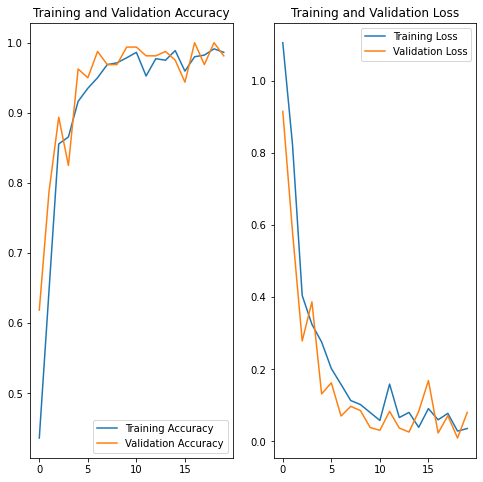

In [ ]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 1BqjHe5igJAgUjiN.png to 1BqjHe5igJAgUjiN.png
1BqjHe5igJAgUjiN.png
rock


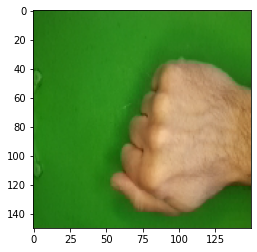

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')